Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447360 entries, 0 to 447359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      447360 non-null  object 
 1   Country_code       445496 non-null  object 
 2   Country            447360 non-null  object 
 3   WHO_region         447360 non-null  object 
 4   New_cases          208549 non-null  float64
 5   Cumulative_cases   447360 non-null  int64  
 6   New_deaths         209492 non-null  float64
 7   Cumulative_deaths  447360 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 27.3+ MB
None

Summary Statistics:
       Date_reported Country_code   Country WHO_region     New_cases  \
count         447360       445496    447360     447360  2.085490e+05   
unique          1864          239       240          7           NaN   
top       2020-01-04           AI  Anguilla        EUR           NaN   
freq     

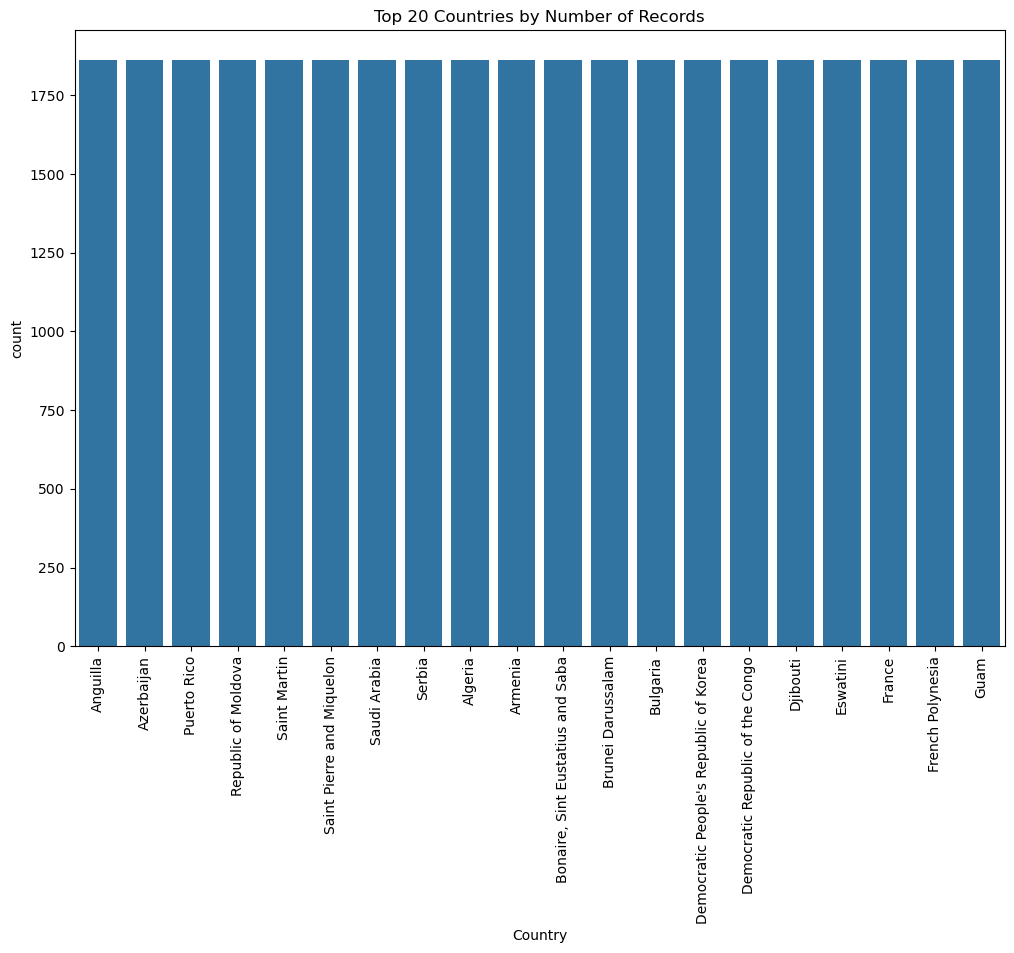

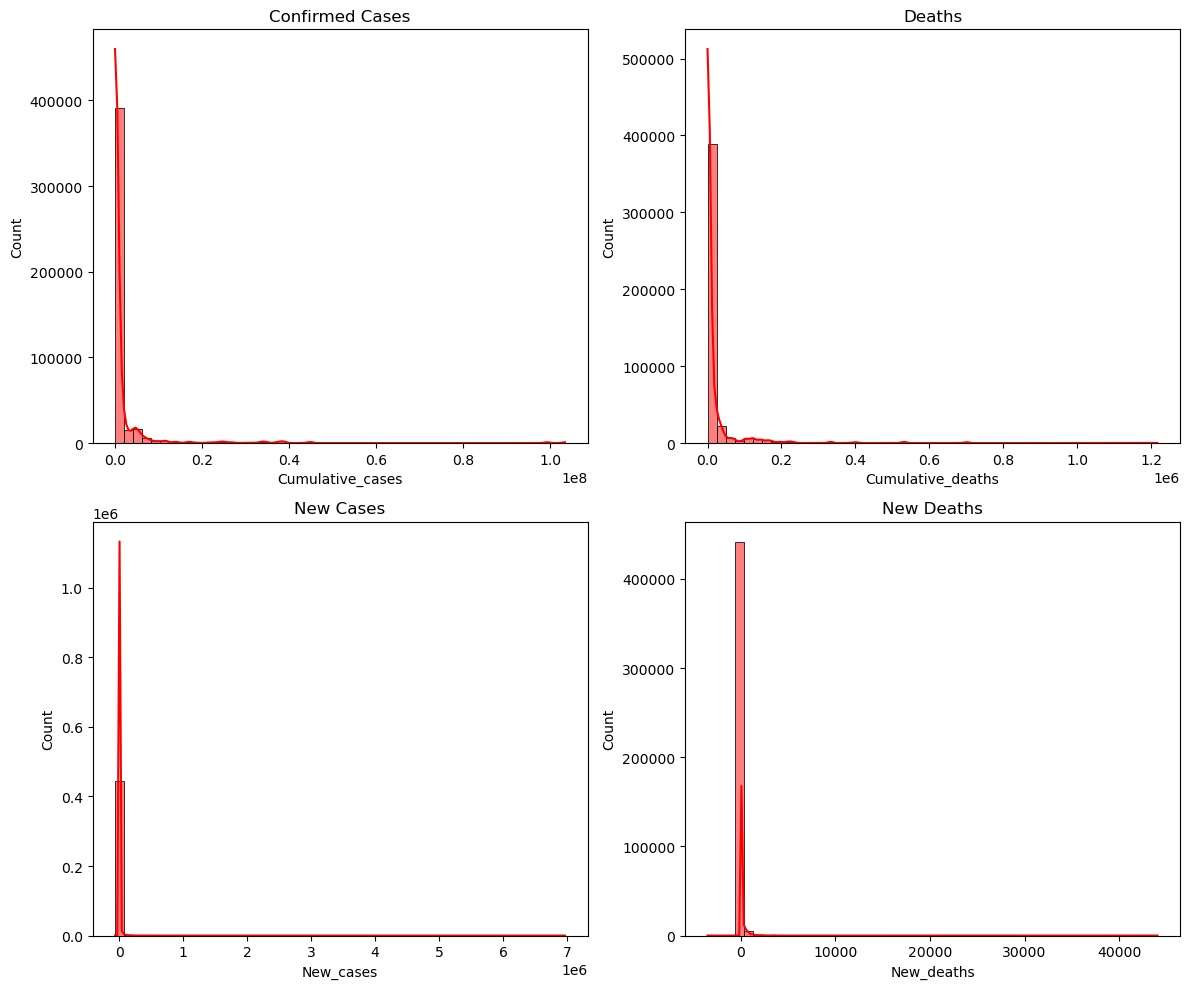

Model Accuracy: 0.22280713519313305
Classification Report:


C:\Users\esusa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\esusa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                        precision    recall  f1-score   support

                                                           Afghanistan       0.44      0.66      0.53       391
                                                               Albania       0.40      0.49      0.44       359
                                                               Algeria       0.24      0.66      0.35       383
                                                        American Samoa       0.00      0.00      0.00       389
                                                               Andorra       0.00      0.00      0.00       381
                                                                Angola       0.62      0.50      0.55       369
                                                              Anguilla       0.02      0.07      0.03       388
                                                   Antigua and Barbuda       0.00      0.00      0.00  

C:\Users\esusa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = r"C:\Users\esusa\Downloads\WHO-COVID-19-global-daily-data.csv"
covid_19_data = pd.read_csv(file_path)

# Display dataset information
print("Dataset Info:")
print(covid_19_data.info())
print()

# Display summary statistics (like in the provided image)
covid_19_data.replace(to_replace='?', value=np.NaN, inplace=True)
print("Summary Statistics:")
print(covid_19_data.describe(include='all'))
print()

# Handle missing values
covid_19_data.fillna(0, inplace=True)  # Filling NaN values with 0

# Visualizing Data
plt.figure(figsize=(12, 8))
sns.countplot(x='Country', data=covid_19_data, order=covid_19_data['Country'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title("Top 20 Countries by Number of Records")
plt.show()

# Plot distributions for key features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(covid_19_data['Cumulative_cases'], bins=50, kde=True, color='red', ax=axes[0, 0])
axes[0, 0].set_title("Confirmed Cases")
sns.histplot(covid_19_data['Cumulative_deaths'], bins=50, kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title("Deaths")
sns.histplot(covid_19_data['New_cases'], bins=50, kde=True, color='red', ax=axes[1, 0])
axes[1, 0].set_title("New Cases")
sns.histplot(covid_19_data['New_deaths'], bins=50, kde=True, color='red', ax=axes[1, 1])
axes[1, 1].set_title("New Deaths")
plt.tight_layout()
plt.show()

# Prepare data for model
features = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
X = covid_19_data[features]
y = covid_19_data['Country']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# Make predictions
y_predict = NB_classifier.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_predict)
print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_predict))
